**Importing required libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [5]:
df=pd.read_csv('/content/train_loan.csv')

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**a. Missing value handling**


Checking null values

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Imputing categorical variables with mode

In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Imputing Numerical features

In [13]:
df['Dependents']= df['Dependents'].str.strip('+')



In [14]:
df['Dependents'].unique()


array(['0', '1', '2', '3', nan], dtype=object)

In [15]:
df['Dependents']=df['Dependents'].astype('float')

(array([345., 102., 152.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

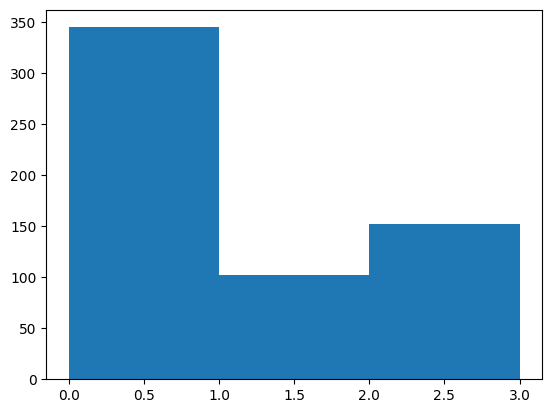

In [16]:
plt.hist(df['Dependents'],bins=3)

In [17]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].median())

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

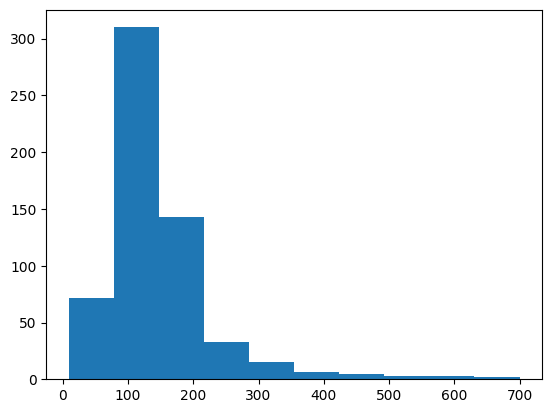

In [18]:
plt.hist(df['LoanAmount'])

In [19]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

(array([ 12.,  61., 527.]),
 array([ 12., 168., 324., 480.]),
 <BarContainer object of 3 artists>)

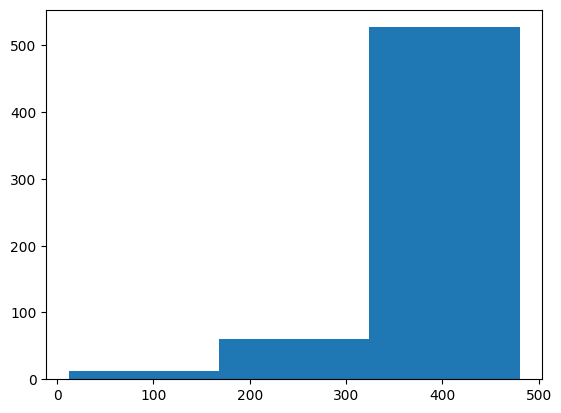

In [20]:
plt.hist(df['Loan_Amount_Term'],bins=3)

In [21]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

(array([ 89., 475.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

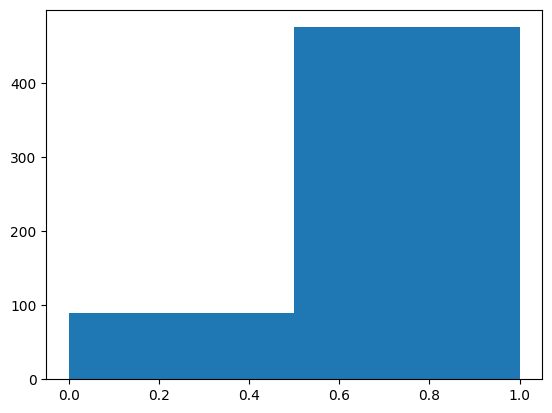

In [22]:
plt.hist(df['Credit_History'],bins=2)

In [23]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**b. Outlier detection**

Box plot to check if outliers present or not

<Axes: >

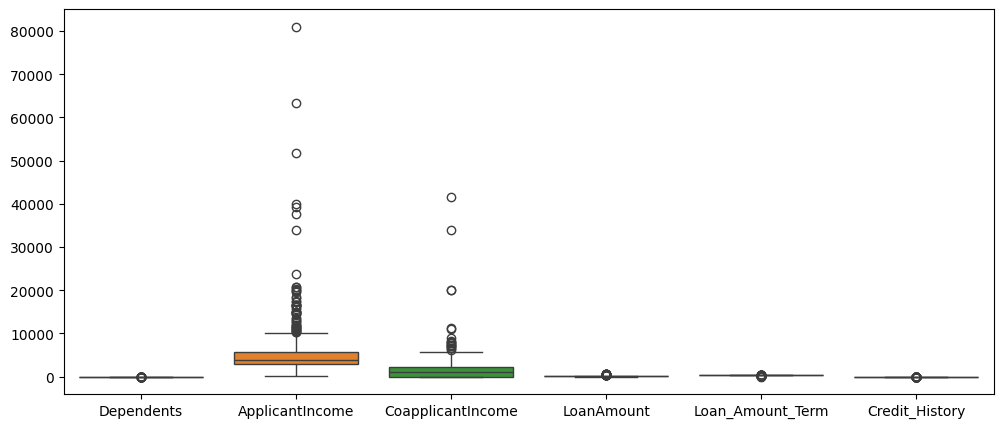

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(df)

Removing outliers in Dependents

<Axes: ylabel='Dependents'>

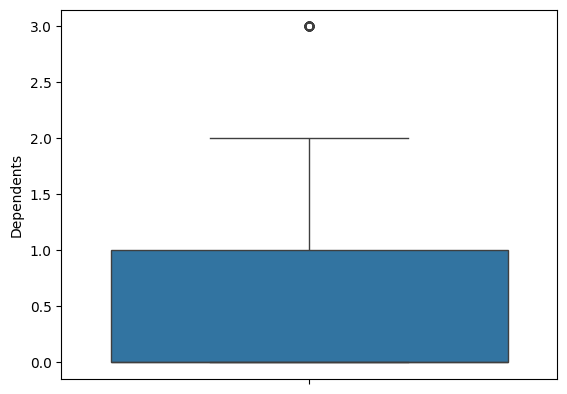

In [26]:
sns.boxplot(df['Dependents'])

In [27]:
q1=df['Dependents'].quantile(0.25)
q3=df['Dependents'].quantile(0.75)
iqr=q3-q1
iqr

1.0

In [28]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [29]:
ul,ll

(2.5, -1.5)

In [30]:
def limit_imputer(value):
  if value>ul:
    return ul
  if value<ll:
    return ll
  else:
    return value

In [31]:
df['Dependents']=df['Dependents'].apply(limit_imputer)

<Axes: ylabel='Dependents'>

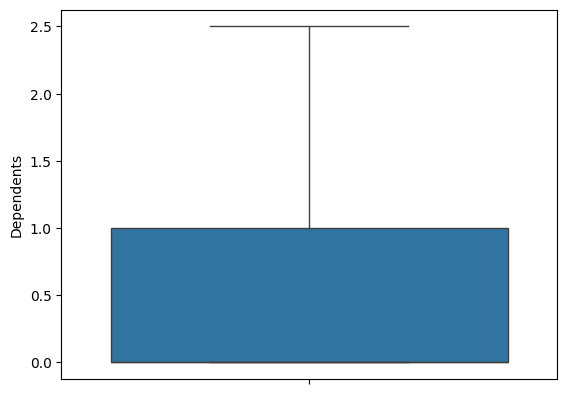

In [32]:
sns.boxplot(df['Dependents'])

Removing outliers in LoanAmount

In [33]:
df['LoanAmount'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

<Axes: ylabel='LoanAmount'>

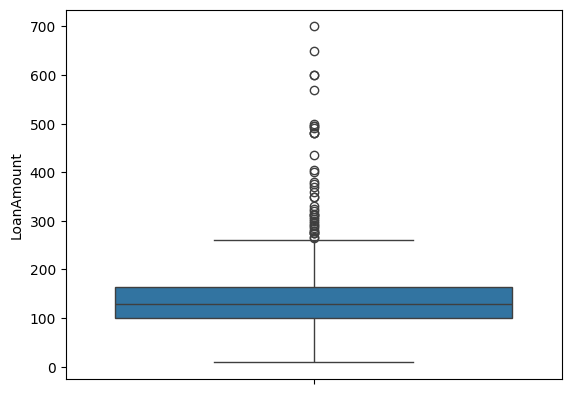

In [34]:
sns.boxplot(df['LoanAmount'])

In [35]:
q1=df['LoanAmount'].quantile(0.25)
q3=df['LoanAmount'].quantile(0.75)
iqr=q3-q1
iqr

64.5

In [36]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(261.5, 3.5)

In [37]:
def limit_imputer(value):
  if value>ul:
    return ul
  if value<ll:
    return ll
  else:
    return value

In [38]:
df['LoanAmount']=df['LoanAmount'].apply(limit_imputer)

<Axes: ylabel='LoanAmount'>

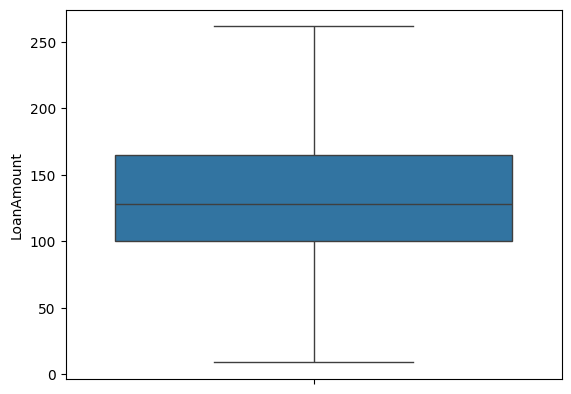

In [39]:
sns.boxplot(df['LoanAmount'])

Removing outliers in Applicant Income

In [40]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

<Axes: ylabel='ApplicantIncome'>

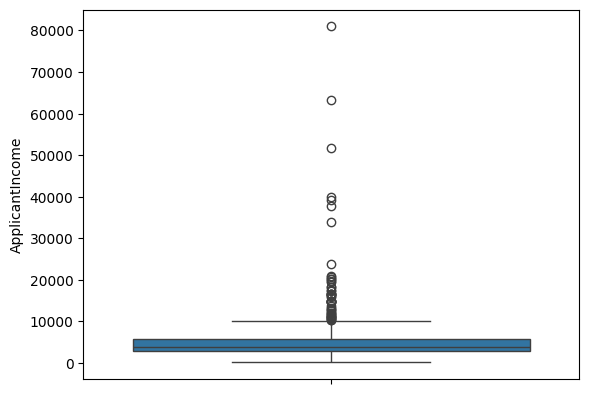

In [41]:
sns.boxplot(df['ApplicantIncome'])

In [42]:
q1=df['ApplicantIncome'].quantile(0.25)
q3=df['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
iqr

2917.5

In [43]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(10171.25, -1498.75)

In [44]:
def limit_imputer(value):
  if value>ul:
    return ul
  if value<ll:
    return ll
  else:
    return value

In [45]:
df['ApplicantIncome']=df['ApplicantIncome'].apply(limit_imputer)

<Axes: ylabel='ApplicantIncome'>

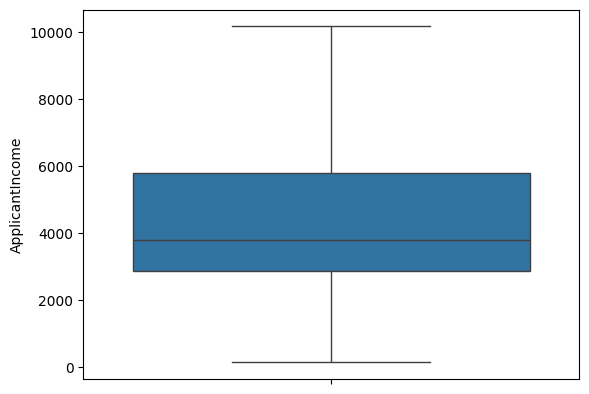

In [46]:
sns.boxplot(df['ApplicantIncome'])

Removing outliers in coapplicant income

In [47]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

<Axes: ylabel='CoapplicantIncome'>

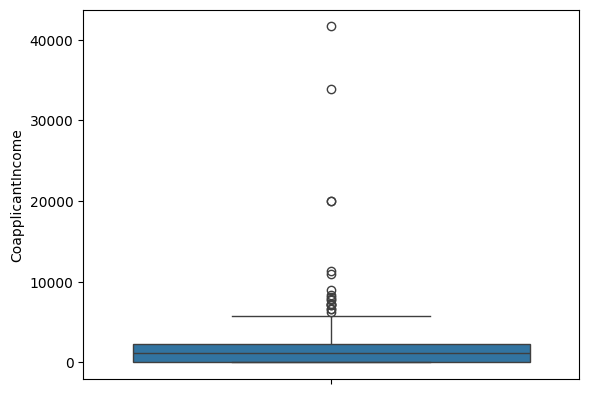

In [48]:
sns.boxplot(df['CoapplicantIncome'])

In [49]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
iqr

2297.25

In [50]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(5743.125, -3445.875)

In [51]:
def limit_imputer(value):
  if value>ul:
    return ul
  if value<ll:
    return ll
  else:
    return value

In [52]:
df['CoapplicantIncome']=df['CoapplicantIncome'].apply(limit_imputer)

<Axes: ylabel='ApplicantIncome'>

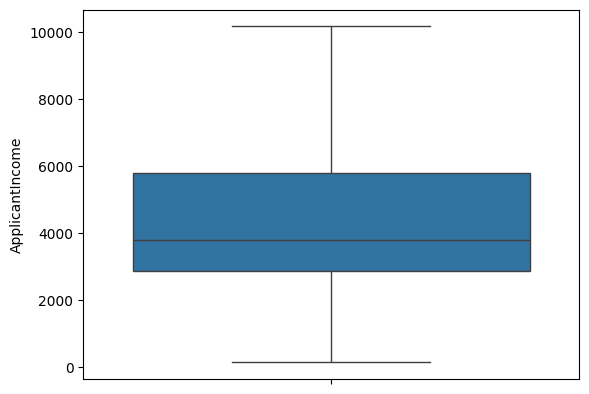

In [53]:
sns.boxplot(df['ApplicantIncome'])

**c. Encoding**

Dropping target column

In [54]:
x=df.drop(columns=['Loan_Status'])

In [55]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,2.5,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2.0,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban


In [56]:
y=df['Loan_Status']

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()

Label Encoding Gender

In [59]:
x['Gender']=le.fit_transform(x['Gender'])

In [60]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,LP001003,1,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,LP001005,1,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,1,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,LP001008,1,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban


Label encoding married


In [61]:
x['Married']=le.fit_transform(x['Married'])

In [62]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,LP001003,1,1,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,LP001005,1,1,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,1,1,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,LP001008,1,0,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban


Label Encoding Self employed

In [63]:
x['Self_Employed']=le.fit_transform(x['Self_Employed'])

In [64]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,0.0,Graduate,0,5849.0,0.0,128.0,360.0,1.0,Urban
1,LP001003,1,1,1.0,Graduate,0,4583.0,1508.0,128.0,360.0,1.0,Rural
2,LP001005,1,1,0.0,Graduate,1,3000.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,1,1,0.0,Not Graduate,0,2583.0,2358.0,120.0,360.0,1.0,Urban
4,LP001008,1,0,0.0,Graduate,0,6000.0,0.0,141.0,360.0,1.0,Urban


One hot encoding education

In [65]:
x=pd.get_dummies(x,columns=['Education'])

One hot encoding property area

In [66]:
x=pd.get_dummies(x,columns=['Property_Area'])

In [67]:
x

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0.0,0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,1
1,LP001003,1,1,1.0,0,4583.0,1508.0,128.0,360.0,1.0,1,0,1,0,0
2,LP001005,1,1,0.0,1,3000.0,0.0,66.0,360.0,1.0,1,0,0,0,1
3,LP001006,1,1,0.0,0,2583.0,2358.0,120.0,360.0,1.0,0,1,0,0,1
4,LP001008,1,0,0.0,0,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,0,2900.0,0.0,71.0,360.0,1.0,1,0,1,0,0
610,LP002979,1,1,2.5,0,4106.0,0.0,40.0,180.0,1.0,1,0,1,0,0
611,LP002983,1,1,1.0,0,8072.0,240.0,253.0,360.0,1.0,1,0,0,0,1
612,LP002984,1,1,2.0,0,7583.0,0.0,187.0,360.0,1.0,1,0,0,0,1


Label encoding target column

In [68]:
y=le.fit_transform(y)

In [69]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

**d. Scaling**

In [70]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [71]:
x.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=mm.fit_transform(x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [72]:
x.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0.0,0,0.568692,0.000000,0.471287,0.74359,1.0,1,0,0,0,1
1,LP001003,1,1,1.0,0,0.442360,0.262575,0.471287,0.74359,1.0,1,0,1,0,0
2,LP001005,1,1,0.0,1,0.284396,0.000000,0.225743,0.74359,1.0,1,0,0,0,1
3,LP001006,1,1,0.0,0,0.242784,0.410578,0.439604,0.74359,1.0,0,1,0,0,1
4,LP001008,1,0,0.0,0,0.583760,0.000000,0.522772,0.74359,1.0,1,0,0,0,1
